

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 


## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [47]:
import numpy as np
from dataclasses import dataclass
from pprint import pprint
import pandas as pd
from collections import namedtuple
from typing import Optional, List, Tuple
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

**1.** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [44]:
input_arr = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
input_arr_no_zeroes = np.random.rand(0,10)


def max_element(arr: np.ndarray):
    
    if len(arr[arr == 0]) == 0:
        return None
    
    x = arr[np.insert(np.diff(input).astype(bool), 0, True)]
    next_el = np.vectorize(lambda x: x + 1)
    res = np.take(x, next_el(np.where(x == 0)[0]), mode='clip')
    return np.max(res[res.nonzero()])

print(max_element(input_arr))
print(max_element(input_arr_no_zeroes))



    
    

5
None


**2. ** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [9]:
input_arr = np.arange(0,10).reshape((2, 5))
val = 9.3

def nearest_value(x: np.ndarray, v: float):
    diff_func = np.vectorize(lambda x: abs(x - v)) 
    return np.take(x, np.argmin(diff_func(x)))

nearest_value(input_arr, val)

9

**3. ** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [22]:

# Simple ndarray (matrix) to test with 

test_matrix = np.array([[0, 0], [0, 0], [1, 1], [1, 1]])

In [25]:
def scale(x: np.ndarray):
    return (x - x.mean()) / x.std()

scale(test_matrix)

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

**4.** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [52]:
input_matrix = np.random.normal(10, 1, 16).reshape(4, 4)

@dataclass
class Stats:
    def __init__(self, matrix: np.ndarray) -> None:
        
        self.determinant = np.linalg.det(matrix)
        self.trace = np.trace(matrix)
        self.max_el = np.max(matrix)
        self.min_el = np.min(matrix)
        self.frobenius_norm = np.linalg.norm(matrix)
        self.eigen_values = np.linalg.eigvals(matrix)
        self.inversed = np.linalg.inv(matrix)
           

def get_stats(x: np.ndarray):
    return Stats(matrix=x)


pprint(get_stats(input_matrix).__dict__)



{'determinant': -39.11033956921605,
 'eigen_values': array([39.81156856, -1.045561  ,  0.77669785,  1.20970874]),
 'frobenius_norm': 40.04638129350938,
 'inversed': array([[ 0.28119916,  0.02687238, -0.61656905,  0.43339415],
       [-1.81722597,  0.84247425,  0.50395438,  0.35857627],
       [-0.50746704, -0.16613262,  0.66607332, -0.08761079],
       [ 1.89921023, -0.61343763, -0.50569937, -0.60690553]]),
 'max_el': 11.873064722749294,
 'min_el': 8.157109290932926,
 'trace': 40.752414146212885}


**5.** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [75]:

max_els = []
all_vals = []

for exp_num in range(100):
    mt1 = np.random.normal(size=100).reshape(10, 10)
    mt2 = np.random.normal(size=100).reshape(10, 10)
    
    max_els.append(np.max(np.matmul(mt1, mt2)))
    all_vals.extend(np.matrix.flatten(mt1).tolist())
    all_vals.extend(np.matrix.flatten(mt2).tolist())
    

maxs_mean = np.mean(max_els)
quantile_95 = np.quantile(all_vals, 0.95)


pprint({'max_mean': maxs_mean, 'quantile_95': quantile_95})
    

{'max_mean': 8.70647550000318, 'quantile_95': 1.6293987019877694}


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [3]:
df = pd.read_csv('2008.csv')


**6.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [37]:
df_cancellation_code_counted =  df['CancellationCode'].dropna().value_counts()
most_common_code = df_cancellation_code_counted.where(df_cancellation_code_counted == df_cancellation_code_counted.max()).reset_index()['index'][0]
print(f"The most common CancellationCode is : {most_common_code}")


The most common CancellationCode is : A


**7.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [39]:
@dataclass
class DistanceInfo:
    def __init__(self, distance: pd.Series) -> None:
        self.max = distance.max()
        self.min = distance.min()
        self.avg = distance.mean()
    

dist_info = DistanceInfo(df['Distance'])

pprint(dist_info.__dict__)        
        


{'avg': 724.5082571428571, 'max': 4962, 'min': 31}


**8.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [66]:
# Flights with min dist

filter = df['Distance'] == dist_info.min
min_dist_flights = df.where(filter).dropna(subset=['Distance'])
pprint(min_dist_flights[['TailNum', 'Distance', 'Year', 'Month', 'DayofMonth']])

      TailNum  Distance    Year  Month  DayofMonth
1116   N795AS      31.0  2008.0   12.0        30.0
6958   N795AS      31.0  2008.0   12.0        26.0
17349  N768AS      31.0  2008.0    8.0        18.0
27534  N764AS      31.0  2008.0    3.0        11.0
46082  N708AS      31.0  2008.0    8.0         9.0
48112  N762AS      31.0  2008.0    2.0        28.0


In [64]:
flights_to_find: np.ndarray = min_dist_flights['TailNum'].values
flights_from_min_dist = df[df['TailNum'].isin(flights_to_find)]


pprint(flights_from_min_dist)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
84     2008      3          16          7   1332.0        1344   1419.0   
994    2008      1           2          3   2359.0        2243    420.0   
1116   2008     12          30          2   1123.0        1007   1148.0   
1872   2008      1           1          2   1301.0        1328   1339.0   
1951   2008     11          30          7   2025.0        2009   2147.0   
...     ...    ...         ...        ...      ...         ...      ...   
67275  2008      8          12          2   1007.0         958   1129.0   
67631  2008      6          11          3   1314.0        1321   1358.0   
67994  2008     10          30          4   1928.0        1845   2013.0   
68514  2008      3          29          6    556.0         600    737.0   
69107  2008      5           1          4    616.0         630    828.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
84           1430    

In [72]:
pprint(flights_from_min_dist.groupby(['TailNum'])['Distance'].mean().reset_index())

  TailNum    Distance
0  N708AS  660.500000
1  N762AS  461.666667
2  N764AS  398.600000
3  N768AS  482.708333
4  N795AS  758.000000


**9.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [4]:
most_popular_airport = df.groupby(['Origin']).size().sort_values().tail(1).reset_index()
most_popular_airport.columns.values[1] = 'TotalFlights'

pprint(most_popular_airport)

  Origin  TotalFlights
0    ATL          4134


**10.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [18]:
mean_airtime_byairport = df.groupby(['Origin']).mean(['Airtime']).reset_index()[['Origin', 'AirTime']]
pprint(mean_airtime_byairport)

    Origin    AirTime
0      ABE  88.266667
1      ABI  36.400000
2      ABQ  93.454321
3      ABY  35.714286
4      ACK  50.800000
..     ...        ...
292    WRG  18.000000
293    XNA  85.945736
294    YAK  35.900000
295    YKM  79.000000
296    YUM  47.470588

[297 rows x 2 columns]


In [28]:
mean_airtime_byairport.sort_values(['AirTime']).dropna().tail(1)


,Origin,AirTime
262,SJU,205.2


**11.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [59]:
delays = df.groupby(['Origin']).filter(lambda x: x.size > 1000).groupby(['Origin']).sum().reset_index()[['Origin', 'DepDelay']]
delays_pos = delays[delays['DepDelay'] > 0]
max_delay = delays_pos.sort_values(['DepDelay']).dropna().tail(1)
pprint(max_delay)

    Origin  DepDelay
117    ORD   60116.0


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [2]:
df = pd.read_csv('2008.csv')


In [3]:
all_nans = df.isnull().sum().values.sum()
samples_with_nan = len(df[df.isna().any(axis=1)].index)
columns_with_nan = df.isnull().sum().where(lambda i: i > 0).dropna().count()

print(f'All NaN values count equals: {all_nans}')
print(f'Samples with at least one NaN values count equals: {samples_with_nan}')
print(f'All columns with at least one NaN value equals: {columns_with_nan}')

All NaN values count equals: 355215
Samples with at least one NaN values count equals: 70000
All columns with at least one NaN value equals: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [4]:
# We can see that the target variable does have missing values

y_has_nan = df['DepDelay'].dropna().count() != len(df['DepDelay'].index)
print(y_has_nan)


True


In [53]:
# As we can see, if the DepDelay time is NaN, then we get a lot 

samples_y_nan = df[df['DepDelay'].isna()]
samples_y_not_nan = df[df['DepDelay'].notna()]

In [54]:
samples_y_nan


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [55]:
samples_y_not_nan

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [65]:
# We can see that CancellationCode and Cancelled are 'positive' only almost if DepTime is NaN, thus can be removed

cancelled_samples = df[df['Cancelled'] > 0] 

print(f'We have {len(cancelled_samples)} flights cancelled and {len(samples_y_nan)} flights with DepDelay NaN')


We have 1411 flights cancelled and 1399 flights with DepDelay NaN


In [71]:
# There is only 12 flights that were cancelled while DepDelay not NaN
# Considering these samples also have DepTime present even though its status is cancelled, we are allowed to consider them as a noisy data 
# Thus we are free to conclude that features going by names 'CancellationCode' and 'Cancelled' can be removed from the dataset

cancelled_with_y_not_nan = df[((df['Cancelled'] > 0) & df['DepDelay'].notna())]
cancelled_with_y_not_nan

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5976,2008,11,29,6,1325.0,1301,NaN,1354,EV,5401,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
15680,2008,12,19,5,954.0,935,NaN,1252,XE,2573,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
16382,2008,12,6,6,1806.0,1728,NaN,1827,OO,5790,...,NaN,11.0,1,B,0,NaN,NaN,NaN,NaN,NaN
20622,2008,10,7,2,844.0,845,NaN,1039,YV,7302,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
22462,2008,12,17,3,2132.0,2134,NaN,2232,YV,2859,...,NaN,28.0,1,B,0,NaN,NaN,NaN,NaN,NaN
30057,2008,12,9,2,1358.0,1330,NaN,1700,OO,2874,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
33611,2008,10,11,6,826.0,830,NaN,1015,OO,3721,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
37581,2008,12,3,3,2234.0,2235,NaN,2318,OO,5426,...,NaN,16.0,1,B,0,NaN,NaN,NaN,NaN,NaN
40343,2008,11,10,1,1440.0,1445,NaN,1731,EV,5309,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
50401,2008,11,29,6,2232.0,2234,NaN,11,OO,6412,...,NaN,21.0,1,B,0,NaN,NaN,NaN,NaN,NaN


In [3]:
x = df[df['DepDelay'].notna()].copy(deep=True)
y = x['DepDelay']
x.drop(columns=['Cancelled', 'CancellationCode','DepDelay'], inplace=True)


**13.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [4]:
@dataclass
class TimeConverted:
    def __init__(self, hours: Optional[int], minutes: Optional[int]):
        self.hours = hours
        self.minutes = minutes

    @staticmethod   
    def convert_time_feature(timestamp):
            
        if np.isnan(timestamp):
            return TimeConverted(None, None)
        
        timestamp = int(timestamp)
    
        return TimeConverted(hours=timestamp // 100, minutes=timestamp % 100)
             

In [5]:
# add DepTime convertion & drop original

dep_time = x['DepTime'].apply(lambda x: TimeConverted.convert_time_feature(x))

x['DepTime_Hour'] = dep_time.apply(lambda x: x.hours)
x['DepTime_Minute'] = dep_time.apply(lambda x: x.minutes)
x.drop(columns=['DepTime'], inplace=True)


# add CRSDepTime convertion & drop original

src_dep_time = x['CRSDepTime'].apply(lambda x: TimeConverted.convert_time_feature(x))
x['CRSDepTime_Hour'] = src_dep_time.apply(lambda x: x.hours)
x['CRSDepTime_Minute'] = src_dep_time.apply(lambda x: x.minutes)
x.drop(columns=['CRSDepTime'], inplace=True)

# add ArrTime convertion & drop original

arr_time = x['ArrTime'].apply(lambda x: TimeConverted.convert_time_feature(x))
x['ArrTime_Hour'] = arr_time.apply(lambda x: x.hours)
x['ArrTime_Minute'] = arr_time.apply(lambda x: x.minutes)
x.drop(columns=['ArrTime'], inplace=True)

# add CRSArrTime convertion & drop original

crs_arr_time = x['CRSArrTime'].apply(lambda x: TimeConverted.convert_time_feature(x))
x['CRSArrTime_Hour'] = arr_time.apply(lambda x: x.hours)
x['CRSArrTime_Minute'] = arr_time.apply(lambda x: x.minutes)
x.drop(columns=['CRSArrTime'], inplace=True)



**14.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [50]:
# It seems like the feature that is too tied to target variable is ArrDelay. In some cases it even mirrors the target variable,
# like can be seen from the code below

arr_dep_equality = df[df['DepDelay'] == df['ArrDelay']]
len_all = len(df.index)
len_equal = len(arr_dep_equality.index)
print(f'The number of rows where ArrDelay equals DepDelay is {len_equal} out of {len_all}.\n'
     f'Which is {(len_equal / len_all) * 100:.2f}% of all items.')


The number of rows where ArrDelay equals DepDelay is 2596 out of 70000.
Which is 3.71% of all items.


In [6]:
# I consider this percentage to be enough to say that ArrDelay should be removed from features
x.drop(columns=['ArrDelay', 'TailNum', 'Year'], inplace=True)

**15.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

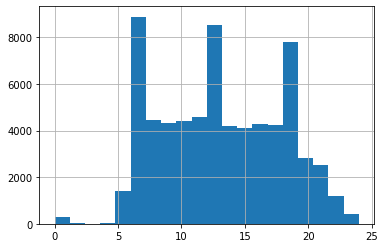

In [9]:
x['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

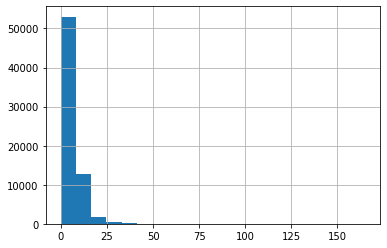

In [10]:
x['TaxiIn'].hist(bins=20)

<AxesSubplot:>

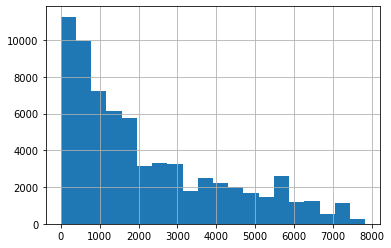

In [11]:
x['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

<br>*The features are inconsistent at ranges (i.e. (0-24), (0-8000))</br> 
Scaling is supposed to make them scale the same way.*

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [7]:
def transform_data(data):
    
    x_category = data.select_dtypes(include='object').fillna('nan')
    x_numeric = data.drop(columns=x_category.columns.values).fillna(0)

    # Scale numeric batch

    st = StandardScaler()
    scaled_x = pd.DataFrame(data=st.fit_transform(x_numeric), index=x_numeric.index, columns=x_numeric.columns)


    # Vectorize category batch

    vectorized_x = pd.get_dummies(x_category)

    # Combine

    return scaled_x.join(vectorized_x)




Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [8]:
x_preprocessed = transform_data(x)

In [9]:
print(f'After preprocessing we ended up with {len(x_preprocessed.columns)} features')

After preprocessing we ended up with 638 features


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.30, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [11]:
lr = LinearRegression()
x_thousand = x_train[0:1000]
y_thousand = y_train[0:1000]
lr.fit(x_thousand, y_thousand)

## MSE TRAIN 1000

y_pred_thousand = lr.predict(x_thousand)
mse_score_thousand = mean_squared_error(y_thousand.values, y_pred_thousand)
print(f'MSE score for train_1000_samples is {mse_score_thousand}')

#R2 TRAIN 1000

r2_score_thousand = lr.score(x_thousand, y_thousand)
print(f'R^2 score for train_1000_samples is {r2_score_thousand}')

# MSE TEST

y_pred_test = lr.predict(x_test)
mse_score_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE score for test_samples is {mse_score_test}')

#R2 TEST

r2_score_test = lr.score(x_test, y_test)
print(f'R^2 score for test_samples is {r2_score_test}')

MSE score for train_1000_samples is 1.7025312610678624e-25
R^2 score for train_1000_samples is 1.0
MSE score for test_samples is 5847.798540498148
R^2 score for test_samples is -3.8240522457354214


In [69]:
sorted_weights = np.sort(lr.coef_)
print(f'Top 10 max weights are {sorted_weights[-10:]}')
print(f'Top 10 min weights are {sorted_weights[0:10]}')


Top 10 max weights are [  0.39474443   0.39474443   0.39474443   0.39474443   0.39474443
   0.39474443   0.61856282   2.04533092  17.72575141 286.69807677]
Top 10 min weights are [-2.77175712e+02 -1.78416056e+01 -2.04533092e+00 -6.18562819e-01
 -5.83486413e-01 -1.09891460e-01 -1.04437643e-01 -8.79215140e-02
 -8.61453846e-02 -8.61453846e-02]


MSE for this model is enormous, it basically doesn't work at all, clearly being over-fitted to those first 1000 samples we got from train set.
Some features got extremely high or low weights thus being overestimated by the model. For this particular reason 'algorithms with regularization' were introduced.


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18.** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [12]:
lasso = LassoCV(cv=5, tol=0.01).fit(x_thousand, y_thousand)
ridge = RidgeCV(cv=5).fit(x_thousand, y_thousand)

alphas = np.linspace(-6,6,50)

# LASSO METRICS

y_pred_test_lasso = lasso.predict(x_test)
mse_score_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print(f'Lasso MSE score for test_samples is {mse_score_test_lasso}')
print(f'Lasso R^2 score for test_samples is {lasso.score(x_test, y_test)}')

# RIDGE METRICS

y_pred_test_ridge = ridge.predict(x_test)
mse_score_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
print(f'Ridge MSE score for test_samples is {mse_score_test_ridge}')
print(f'Ridge R^2 score for test_samples is {ridge.score(x_test, y_test)}')

Lasso MSE score for test_samples is 957.2701893777696
Lasso R^2 score for test_samples is 0.2103145525854554
Ridge MSE score for test_samples is 2824.0050351278483
Ridge R^2 score for test_samples is -1.3296198966724555


It is still extremely far from acceptable results, but already shows a better performance that the basic LinearRegression model.


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19.** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Implemented in one class (LinearRegrssionMPSE) in a cell down the page

**20.** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# Implemented in one class (LinearRegrssionMPSE) in a cell down the page

**21.** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [48]:
# CLASS THAT IMPLEMENTS 19,20,21 TASKS


class LinearRegressionMSPE():
    def __init__(self, max_iter = 1000, step_size = 0.001,  is_reg = False, lamda = 0.01, is_w_random = True):
        self.__max_iter: int = max_iter
        self.__step_size: float = step_size
        self.__is_reg: bool = is_reg
        self.__lamda: float = lamda
        self.__w: Optional[np.ndarray] = None
        self.__history: Optional[list] = None
        self.__is_w_random = is_w_random
        
    def get_cost_history(self):
        
        if self.__history is None:
            raise Exception('There is no history yet, consider fitting data to the model.')
        
        return self.__history 
        
    def get_coef(self):
        return self.__w
        
    def get_init_params(self):
        return {'max_iter': self.__max_iter,
                'step_size': self.__step_size,
                'is_regularized': self.__is_reg,
                'regularization coef': self.__lamda}
    def _set_cost_history(self, history: list):
        self.__history = history    
    
    def _set_coef(self, new_w):
        self.__w = new_w
    
    # Task 21
    def grad_descent(self, X, y, eps: float):
        
        X, y = self._preprocess_input(X, y)
        
        if not self.__w:
            if not self.__is_w_random:
                self._set_coef(np.zeros(X.shape[1]))
                
            self._set_coef(np.random.rand(X.shape[1]))
            
        
        m = len(y)
        J_history = []
        w_prev = None
        
        for _ in range(self.__max_iter):
            
            if w_prev is not None and np.linalg.norm(w_prev - self.__w) < eps:
                break
            
            w_prev = self.__w.copy()
            new_w = self.__w - self.__step_size / m * self._grad_func(X, y)
            self._set_coef(new_w=new_w)
            # Save the cost J in every iteration
            cost = self._cost_func(X, y)
            # print(f'{i}:{cost}')
            J_history.append(cost)
            
        print(J_history[-100:])
        
        self._set_cost_history(J_history)

        return self
    
    
    # Task 19
    def _preprocess_input(self, X: pd.DataFrame, y: Optional[pd.DataFrame] = None):
          
        X = X.to_numpy()
        X  = np.hstack((np.ones((X.shape[0], 1)), X))
        
        if y is None:
            return X
        else: 
            return (X, y.to_numpy())
        
    
    # Task 21     
    def _cost_func(self, X, y):
        if self.__is_reg:
            return self._get_reg_func(X, y)
        else:
            return self._get_func(X, y)
    # Task 21    
    def _grad_func(self, X, y):
        if self.__is_reg:
            return self._get_reg_grad(X, y, self.__lamda)
        else: 
            return self._get_grad(X, y)
    
    
    #Task 20    
    # возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
    def _make_pred(self, X: np.ndarray):
        return np.matmul(X, self.__w)
       
    def predict(self, X: pd.DataFrame):
        x = self._preprocess_input(X)
        return self._make_pred(x)
    
    #Task 20
    # возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
    def _get_func(self, X, y):
        prediction = self._make_pred(X)
        m = len(y)
        return (1 / m) * (np.mean(np.square(((y - prediction) / prediction))))
    
    # Task 20
    # возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
    def _get_grad(self, X: np.ndarray, y):
        hc = self._make_pred(X) - y
        return np.matmul(X.transpose(), hc)
    
    # Task 20
    # возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
    # As we need L2 regularization we just add it with corresponding parameter
    def _get_reg_func(self, X, y):
        prediction = self._make_pred(X)
        return np.mean(np.square(((y - prediction) / prediction))) + np.linalg.norm(self.__w, ord=2)
    
    # Task 20
    # возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
    # I also added 'lamda' param which is basically a regularization coef
    def _get_reg_grad(self, X: np.ndarray, y: np.ndarray, lamda: float):
        hc = self._make_pred(X) - y
        return (np.matmul(X.transpose(), hc) + (lamda * self.__w))
    
          


        
        

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [49]:
# TRAIN NON REGULARIZED MODEL


step_size_params = [0.001, 1, 10]
models:List[Tuple[LinearRegressionMSPE, LinearRegressionMSPE]] = []

for s in step_size_params:
    model_rand = LinearRegressionMSPE(step_size=s)
    model_zeros = LinearRegressionMSPE(step_size=s, is_w_random=False)
    model_rand.grad_descent(X=x_train, y=y_train, eps=0.01)
    model_zeros.grad_descent(X=x_train, y=y_train, eps=0.01)
    models.append((model_rand, model_zeros))



[1.945208755870049, 66.1829655269275, 0.311456717667402, 0.8550504253462153, 6.710149392101022, 0.9647194087322479, 6.044711887309621, 3.711384722774154, 2.7338164492785753, 0.38928243564425163, 0.3481923292174106, 0.49597349206622193, 234.63125414121384, 0.20795140196109016, 0.28884071497730374, 2.134702796319481, 0.3756882660156734, 0.6730782625511238, 0.964011336289193, 1.1568556907750298, 30.714334338693323, 13.703869569441974, 13.10070799122959, 3.1806739035523397, 95.53874725469626, 19.761183562463007, 12.914478679586258, 1.8991139838681739, 0.9141232953462495, 0.8330061618614507, 7.22757191151298, 35.91600718030449, 23.323596196923038, 0.2225838405027405, 1.5000927026772874, 4.962275342598987, 4311.566170852356, 0.6003660761439683, 1.0915761329964448, 6.658805138089471, 1.5716591768390147, 211.86870121041733, 1.9199361395318477, 0.6077925661126721, 1.0482123498547256, 0.5880695110098197, 1.0142735149555082, 0.4847651385337608, 1.5223521208932833, 4.131477730140241, 49.9741803425

/tmp/ipykernel_6848/3609638073.py:117: RuntimeWarning: overflow encountered in matmul
  return np.matmul(X.transpose(), hc)
/tmp/ipykernel_6848/3609638073.py:100: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(X, self.__w)
/tmp/ipykernel_6848/3609638073.py:111: RuntimeWarning: invalid value encountered in true_divide
  return (1 / m) * (np.mean(np.square(((y - prediction) / prediction))))
/tmp/ipykernel_6848/3609638073.py:117: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(X.transpose(), hc)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [50]:

# IN MY IMPLEMENTATION AND WITH MY SETUP LARGE STEP SIZE DID NOT CONVERGE AT ALL
# SO ONLY RESULTS FOR THE 0.001 STEP SIZE PARAM ARE AVAILABLE

@dataclass
class TrainResult():
    def __init__(self, model, mse, r2):
        self.model = model
        self.mse = mse
        self.r2 = r2
        
training_results: List[TrainResult] = []

for model_rand, model_zeros in models: 
    coefs = model.get_coef()
    if not np.isnan(coefs).any():
        y_predicted = model_rand.predict(x_test)
        mse = mean_squared_error(y_test.values, y_predicted) 
        r2 = r2_score(y_test.values, y_predicted)
        training_results.append(TrainResult(model, mse, r2))
        step_size = model_rand.get_init_params()['step_size']
        print(f'For the model with the step_size of {step_size} \n' 
            f'MSE is {mse} and R^2 is {r2} \n'\
            '\n')
        print(f'Iterations performed for model_rand is {len(model_rand.get_coef())} \n' \
              f'and for model_zeros is {len(model_zeros.get_coef())}')

  
    

**22.** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [42]:
# TRAIN REGULARIZED MODEL

step_size_params = [0.001, 1, 10]
models_reg: List[LinearRegressionMSPE] = []

for s in step_size_params:
    model = LinearRegressionMSPE(step_size=s, is_reg=True)
    model.grad_descent(X=x_train, y=y_train, eps=0.01)
    models.append(model)

[38470.50072401807, 317621.61616979056, 948413.8402679941, 625315.7986769127, 10804.568820224684, 53120.328562739145, 595292.4720692108, 64649.34660777337, 18556667.606428042, 45020.717771042844, 95056.680861701, 113168.39287440426, 751476.3947362938, 5314589.375359411, 3373376.727980231, 109484.48727481633, 80223.63245444823, 962231.7980353853, 100566.82085559661, 55179.233442231125, 16624.881260749295, 385788.19357171544, 16280.314396873044, 165554.50406042693, 12045.819557157416, 21792.67796090797, 79736.77333478128, 35178.24025242006, 79333.95484991057, 6113567.036707171, 136261.9200511232, 115688.8954659182, 137104.9376654796, 203725.67993635914, 29245.582398463124, 925275.6891457741, 123253.64499752999, 38604.16452932609, 374559.29969201516, 1158319.5475724882, 739607.9303648953, 1756136.0130943328, 112490.64378850488, 787615.1030715572, 439230.20867146685, 406602.10203213885, 1002835.6866843111, 14925134.612194851, 204570.93894130728, 71328.78877973487, 8067659.560160523, 118651

/tmp/ipykernel_6848/1446434379.py:127: RuntimeWarning: overflow encountered in matmul
  return (np.matmul(X.transpose(), hc) + (lamda * self.__w))
/tmp/ipykernel_6848/1446434379.py:96: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(X, self.__w)
/tmp/ipykernel_6848/1446434379.py:120: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.square(((y - prediction) / prediction))) + np.linalg.norm(self.__w, ord=2)
/tmp/ipykernel_6848/1446434379.py:127: RuntimeWarning: invalid value encountered in matmul
  return (np.matmul(X.transpose(), hc) + (lamda * self.__w))


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23.**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24.** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25.** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here